# Instalação
Para instalar o pycaret, abra um terminal com acesso ao anaconda e execute os seguintes comandos:

Crie um ambiente virtual para a instalação do pycaret

- $ conda create -n pycaret_env python=3.8 

Ative o ambiente criado

- conda activate pycaret_env

Instale os pacotes necessários:

- pip install pycaret
- pip install xgboost
- pip install catboost
- pip install jupyter

In [1]:
import pycaret
pycaret.__version__

'2.3.10'

In [2]:
import numpy as np
import pandas as pd

# Carregando os dados

In [3]:
df_abt = pd.read_csv('../data/propensao_revenda_abt.csv')

df_train = df_abt.query('data_ref < "2018-03-01"')
df_oot   = df_abt.query('data_ref == "2018-03-01"')

In [4]:
df_abt.head()

,data_ref,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


# Identificando as variáveis de modelagem

In [5]:
key_vars = ['data_ref', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_6m'

features = cat_vars + num_vars

# Iniciando a modelagem no PyCaret

In [7]:
from pycaret.classification import *

experimento = setup(data=df_train,    # dataset de treino
                    test_data=df_oot, # dataset de teste/out of time
                    target=target,    # variável target
                    ignore_features=key_vars, # lista de variáveis a serem ignoradas na modelagem
                    categorical_features=cat_vars, # lista de variáveis categóricas
                    numeric_features=num_vars, # lista de variáveis numéricas
                    session_id=24, # equivalente ao random_state
                    verbose=False
                    )

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
uf,Categorical
tot_orders_12m,Numeric
tot_items_12m,Numeric
tot_items_dist_12m,Numeric
receita_12m,Numeric
recencia,Numeric
nao_revendeu_next_6m,Label


In [8]:
type(experimento)

tuple

In [9]:
len(experimento)

43

Podemos sempre rever qual a configuração do experimento que estamos realizado com o comando `help(get_config)`

In [10]:
help(get_config)

Help on function get_config in module pycaret.classification:

get_config(variable: str)
    This function retrieves the global variables created when initializing the
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment param


In [11]:
get_config('X')

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_AM,uf_BA,uf_CE,uf_DF,uf_ES,...,uf_PE,uf_PI,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RS,uf_SC,uf_SE,uf_SP
0,3.0,3.0,1.0,2685.000000,74.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,171.0,207.0,9.0,21275.230469,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,42.0,15.0,781.799988,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,120.000000,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,130.0,141.0,75.0,16228.879883,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,10.0,10.0,5.0,9976.799805,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3491,2.0,2.0,2.0,84.800003,27.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3492,8.0,9.0,7.0,1254.099976,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3493,10.0,10.0,2.0,1359.900024,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Treinando vários modelos

A função `compare_models` treina vários algoritmos de uma vez, utilizando validação cruzada na base de treino.

In [9]:
best_model = compare_models(fold=5, sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8509,0.9221,0.7756,0.8231,0.7985,0.6804,0.6813,0.3280
xgboost,Extreme Gradient Boosting,0.8518,0.9210,0.7973,0.8108,0.8038,0.6847,0.6851,0.1580
et,Extra Trees Classifier,0.8558,0.9195,0.7778,0.8331,0.8044,0.6904,0.6915,0.3140
catboost,CatBoost Classifier,0.8435,0.9179,0.7771,0.8058,0.7910,0.6660,0.6664,7.8820
lightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,0.0260
gbc,Gradient Boosting Classifier,0.8352,0.9127,0.7681,0.7936,0.7803,0.6485,0.6491,0.0960
lda,Linear Discriminant Analysis,0.8103,0.8979,0.5803,0.8816,0.6997,0.5696,0.5963,0.0060
ada,Ada Boost Classifier,0.8223,0.8974,0.7425,0.7821,0.7611,0.6199,0.6212,0.0540
lr,Logistic Regression,0.8235,0.8973,0.6532,0.8490,0.7381,0.6084,0.6204,1.0200
nb,Naive Bayes,0.5525,0.8662,0.9474,0.4582,0.6176,0.2132,0.3049,0.3680


# Desabilitando a cross-validation
Podemos também desabilitar a validação cruzada (cross-validation). Dessa forma, as métricas são calculadas na base de treino completa.

In [10]:
best_model = compare_models(fold=5, sort='auc', cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8639,0.9246,0.8294,0.8192,0.8243,0.7133,0.7133,5.6800
rf,Random Forest Classifier,0.8618,0.9224,0.8031,0.8319,0.8172,0.7062,0.7064,0.3800
catboost,CatBoost Classifier,0.8575,0.9205,0.8100,0.8179,0.8139,0.6985,0.6985,4.4000
et,Extra Trees Classifier,0.8650,0.9178,0.8031,0.8391,0.8207,0.7125,0.7130,0.3900
lightgbm,Light Gradient Boosting Machine,0.8527,0.9176,0.8017,0.8129,0.8073,0.6881,0.6881,3.8500
gbc,Gradient Boosting Classifier,0.8388,0.9128,0.7920,0.7898,0.7909,0.6598,0.6598,0.4300
lr,Logistic Regression,0.8260,0.8991,0.6865,0.8319,0.7523,0.6201,0.6269,0.5300
lda,Linear Discriminant Analysis,0.8074,0.8984,0.5687,0.8913,0.6943,0.5635,0.5939,0.0100
ada,Ada Boost Classifier,0.8335,0.8982,0.7601,0.7977,0.7784,0.6452,0.6457,0.1800
nb,Naive Bayes,0.5678,0.8645,0.9431,0.4693,0.6267,0.2322,0.3209,0.0000


# Alterando o ponto de corte da probabilidade

Podemos alterar o ponto de corte na probabilidade, que por padrão é de 0.5

In [11]:
best_model = compare_models(fold=5, sort='auc', probability_threshold=0.8)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8189,0.9221,0.5556,0.9471,0.7000,0.5828,0.6254,0.3400
xgboost,Extreme Gradient Boosting,0.8292,0.9210,0.6059,0.9179,0.7291,0.6123,0.6409,0.1420
et,Extra Trees Classifier,0.8249,0.9195,0.5841,0.9305,0.7174,0.6001,0.6344,0.2880
catboost,CatBoost Classifier,0.8072,0.9179,0.5331,0.9325,0.6775,0.5544,0.5989,5.9520
lightgbm,Light Gradient Boosting Machine,0.8100,0.9159,0.5496,0.9200,0.6868,0.5631,0.6023,0.0280
gbc,Gradient Boosting Classifier,0.7946,0.9127,0.5053,0.9202,0.6519,0.5232,0.5707,0.1000
lda,Linear Discriminant Analysis,0.7637,0.8979,0.4144,0.9237,0.5717,0.4396,0.5071,0.0060
ada,Ada Boost Classifier,0.6189,0.8974,0.0000,0.0000,0.0000,0.0000,0.0000,0.0460
lr,Logistic Regression,0.7845,0.8973,0.4768,0.9192,0.6275,0.4967,0.5498,0.0260
nb,Naive Bayes,0.5691,0.8662,0.9444,0.4679,0.6257,0.2363,0.3255,0.0060


# Treinando apenas alguns modelos

Podemos treinar apenas alguns modelos desejados

In [12]:
best_model = compare_models(fold=5, sort='auc', include=['rf', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8509,0.9221,0.7756,0.8231,0.7985,0.6804,0.6813,0.3660
xgboost,Extreme Gradient Boosting,0.8518,0.9210,0.7973,0.8108,0.8038,0.6847,0.6851,0.1480
catboost,CatBoost Classifier,0.8435,0.9179,0.7771,0.8058,0.7910,0.6660,0.6664,5.0660
lightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,0.0300


# Treinando apenas um modelo

Para treinarmos apenas um algoritmo específico, utilizamos a função `create_model()`, onde o primeiro argumento é o nome do algoritmo desejado:

In [13]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8498,0.9242,0.7603,0.8320,0.7945,0.6765,0.6782
1,0.8312,0.9100,0.7378,0.8041,0.7695,0.6367,0.6382
2,0.8612,0.9186,0.7857,0.8394,0.8117,0.7020,0.7029
3,0.8484,0.9276,0.7782,0.8150,0.7962,0.6755,0.6760
4,0.8641,0.9299,0.8158,0.8251,0.8204,0.7111,0.7111
Mean,0.8509,0.9221,0.7756,0.8231,0.7985,0.6804,0.6813
Std,0.0116,0.0071,0.0260,0.0124,0.0174,0.0259,0.0255


Perceba como as métricas possuem os mesmos valores da tabela anterior.

# Customizando a criação do modelo

Podemos passar qualquer parâmetro pertinente ao modelo na função `create_model()`.

In [14]:
rf = create_model('rf', max_depth=5, n_estimators=300, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8355,0.8978,0.7416,0.8115,0.7750,0.6457,0.6473
1,0.8083,0.8849,0.7378,0.7548,0.7462,0.5922,0.5923
2,0.8541,0.8993,0.7594,0.8417,0.7984,0.6845,0.6868
3,0.8455,0.9057,0.7857,0.8038,0.7947,0.6708,0.6710
4,0.8298,0.8982,0.7669,0.7816,0.7742,0.6376,0.6377
Mean,0.8346,0.8972,0.7583,0.7987,0.7777,0.6462,0.6470
Std,0.0156,0.0068,0.0175,0.0292,0.0186,0.0318,0.0324


`max_depth` e `n_estimators` são parâmetros do modelo `RandomForestClassifier` do `scikit-learn`. Podemos também desabilitar a validação cruzada assim como feito anteriormente. Basta passarmos o parâmetro `cross_validation=False`


In [15]:
rf = create_model('rf', max_depth=5, n_estimators=300, cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8415,0.8966,0.7725,0.8072,0.7895,0.6625,0.6629


# Acessando a lista de modelos disponíveis

A função `models()` nos dá acesso a uma tabela com todos os modelos disponíveis no pycaret para classificação.

In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# Treinando modelos em um loop

Vamos exemplificar o treinamento de várias random forest, alterando o parâmetro max_depth e observando como se comportam as métricas.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8526,0.9278,0.7640,0.8361,0.7984,0.6827,0.6844
1,0.8226,0.9107,0.7416,0.7826,0.7615,0.6205,0.6210
2,0.8598,0.9191,0.7782,0.8415,0.8086,0.6983,0.6996
3,0.8584,0.9279,0.7970,0.8249,0.8107,0.6976,0.6979
4,0.8612,0.9294,0.8120,0.8213,0.8166,0.7050,0.7050
Mean,0.8509,0.9230,0.7786,0.8213,0.7992,0.6808,0.6816
Std,0.0145,0.0071,0.0247,0.0207,0.0197,0.0310,0.0310


<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

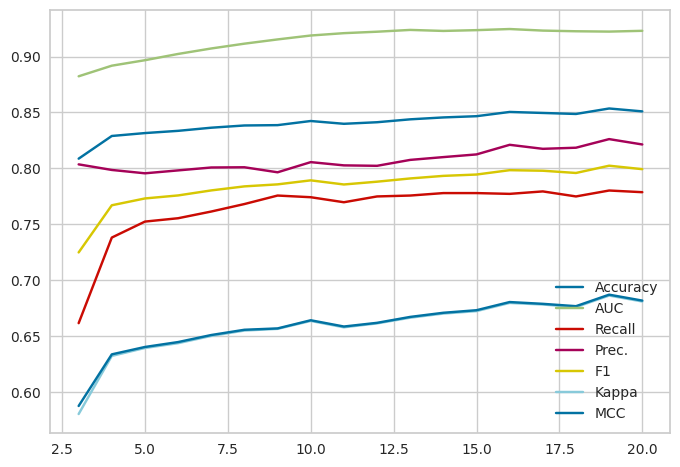

In [17]:
models = []
results = []

for max_depth in range(3, 21):
    model = create_model('rf', max_depth=max_depth, fold=5) 
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)

results_df = pd.concat(results, axis=0)
results_df.index = range(3, 21)
results_df.plot()

A `AUC` apresenta uma tendência de aumento à medida que aumentamos o valor do parâmetro max_depth. Vamos  então criar uma RandomForest com o `max_depth=20`

In [18]:
rf = create_model('rf', max_depth=20, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8526,0.9278,0.7640,0.8361,0.7984,0.6827,0.6844
1,0.8226,0.9107,0.7416,0.7826,0.7615,0.6205,0.6210
2,0.8598,0.9191,0.7782,0.8415,0.8086,0.6983,0.6996
3,0.8584,0.9279,0.7970,0.8249,0.8107,0.6976,0.6979
4,0.8612,0.9294,0.8120,0.8213,0.8166,0.7050,0.7050
Mean,0.8509,0.9230,0.7786,0.8213,0.7992,0.6808,0.6816
Std,0.0145,0.0071,0.0247,0.0207,0.0197,0.0310,0.0310


Já conseguimos melhorar a métrica! Saimos de uma AUC de `0.9221` para `0.9230`.

# Otimização de hiper-parâmetros

Para fazermos uma otimização de hiper-parâmetros, também conhecida como grid-search ou random-search, utilizamos a função `tune_model()`. Por padrão, a função utiliza o `RandomGridSearch` do scikit-learn.

In [19]:
rf_tuned = tune_model(rf, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8255,0.9088,0.7303,0.7959,0.7617,0.6244,0.6259
1,0.8083,0.8871,0.7416,0.7529,0.7472,0.5928,0.5928
2,0.8555,0.9058,0.7744,0.8340,0.8031,0.6892,0.6904
3,0.8369,0.9173,0.7895,0.7836,0.7865,0.6546,0.6546
4,0.8255,0.9072,0.7782,0.7667,0.7724,0.6309,0.6309
Mean,0.8303,0.9052,0.7628,0.7866,0.7742,0.6384,0.6389
Std,0.0156,0.0099,0.0228,0.0279,0.0194,0.0322,0.0324


In [20]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

In [21]:
rf_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

# Aumentando a quantidade de iterações

Por padrão, a função tenta 10 iterações para encontrar um modelo melhor. Podemos aumentar esse valor.

In [22]:
rf_tuned = tune_model(rf, fold=5, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8369,0.9220,0.8352,0.7611,0.7964,0.6609,0.6629
1,0.8112,0.8980,0.8165,0.7243,0.7676,0.6095,0.6126
2,0.8455,0.9137,0.8421,0.7724,0.8058,0.6779,0.6796
3,0.8326,0.9193,0.8459,0.7475,0.7937,0.6538,0.6573
4,0.8283,0.9166,0.8684,0.7310,0.7938,0.6486,0.6557
Mean,0.8309,0.9139,0.8416,0.7473,0.7915,0.6501,0.6536
Std,0.0114,0.0084,0.0168,0.0180,0.0127,0.0226,0.0222


# Escolhendo a métrica a ser otimizada

Por padrão, a acurácia é otimizada. Vamos otimizar a AUC.

In [23]:
rf_tuned = tune_model(rf, fold=5, n_iter=50, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8369,0.9220,0.8352,0.7611,0.7964,0.6609,0.6629
1,0.8112,0.8980,0.8165,0.7243,0.7676,0.6095,0.6126
2,0.8455,0.9137,0.8421,0.7724,0.8058,0.6779,0.6796
3,0.8326,0.9193,0.8459,0.7475,0.7937,0.6538,0.6573
4,0.8283,0.9166,0.8684,0.7310,0.7938,0.6486,0.6557
Mean,0.8309,0.9139,0.8416,0.7473,0.7915,0.6501,0.6536
Std,0.0114,0.0084,0.0168,0.0180,0.0127,0.0226,0.0222


# Passando um grid de parâmetros customizável

In [24]:
params = {
    'max_depth': [3, 5, 7, 11, 13, 15, 17, 21, 23, 25],
    'n_estimators': [100, 200, 30, 400, 500, 1000]
}

rf_tuned = tune_model(rf, fold=5, n_iter=50, optimize='AUC', custom_grid=params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8455,0.9321,0.7528,0.8272,0.7882,0.6670,0.6689
1,0.8212,0.9120,0.7453,0.7773,0.7610,0.6182,0.6186
2,0.8598,0.9192,0.7820,0.8387,0.8093,0.6987,0.6998
3,0.8526,0.9295,0.7970,0.8123,0.8046,0.6863,0.6864
4,0.8627,0.9306,0.8271,0.8148,0.8209,0.7095,0.7096
Mean,0.8484,0.9247,0.7808,0.8141,0.7968,0.6760,0.6766
Std,0.0148,0.0078,0.0298,0.0206,0.0208,0.0321,0.0321


In [25]:
rf_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

# Avaliando a performance do modelo

Calculando a curva ROCAUC na base out of time:

In [ ]:
plot_model(rf_tuned, plot='auc')

In [ ]:
# na base de treino
plot_model(rf_tuned, plot='auc', use_train_data=True)

Podemos mudar a resolução da figura através do parâmetro `scale`:

In [ ]:
plot_model(rf_tuned, plot='auc', scale=1.5)

Matriz de confusão

In [ ]:
plot_model(rf_tuned, plot='confusion_matrix', scale=0.8)

Customizando a Matriz de confusão:

In [ ]:
plot_model(rf_tuned, plot='confusion_matrix', scale=0.8, plot_kwargs={'percent': True})

Plotando a feature importance das top 10 variáveis

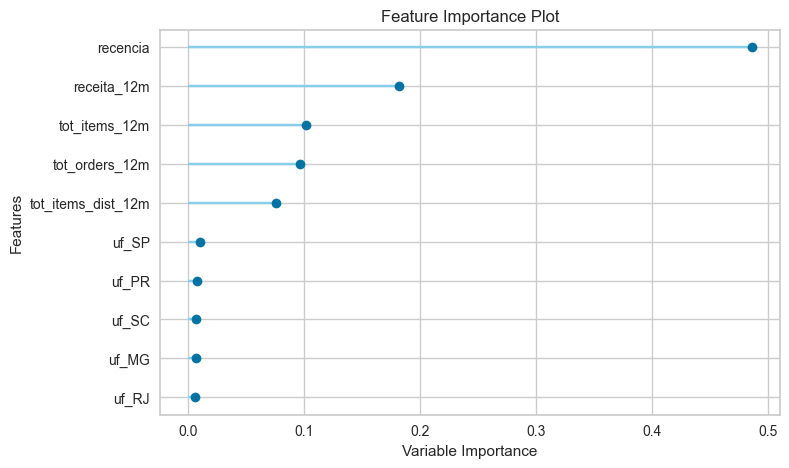

In [73]:
plot_model(rf_tuned, plot='feature', scale=1)

Para plotar todas, basta utilizar `plot="feature_all"`

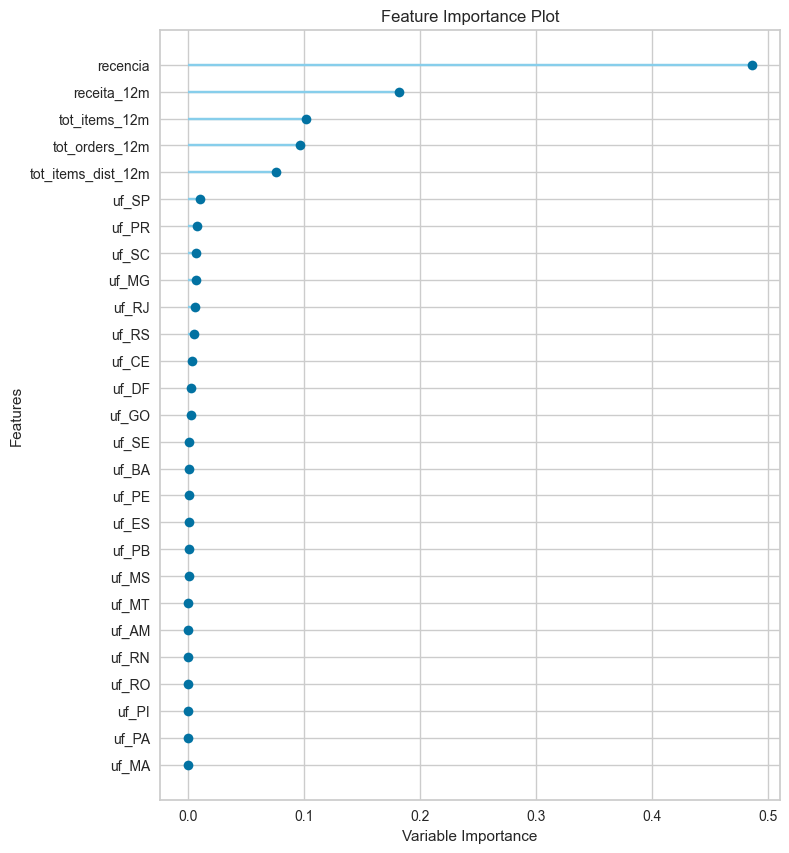

In [74]:
plot_model(rf_tuned, plot='feature_all', scale=1)

Buscando os hiperparâmetros do modelo

In [75]:
plot_model(rf_tuned, plot='parameter', scale=1)

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,17
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


Curvas de `ganhos cumulativos` e `lift` e `ks`:

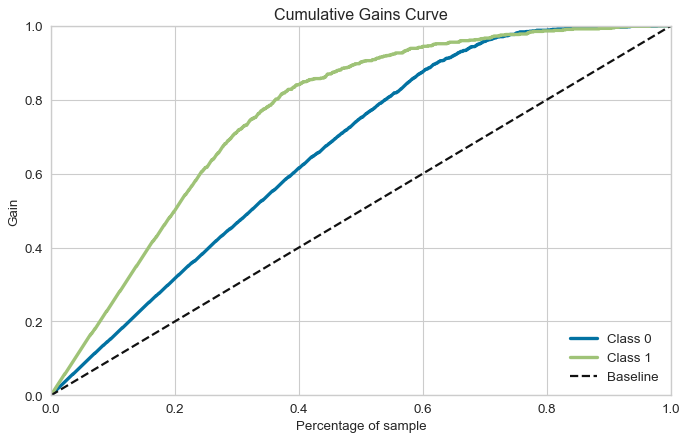

In [77]:
plot_model(rf_tuned, plot='gain', scale=0.8)

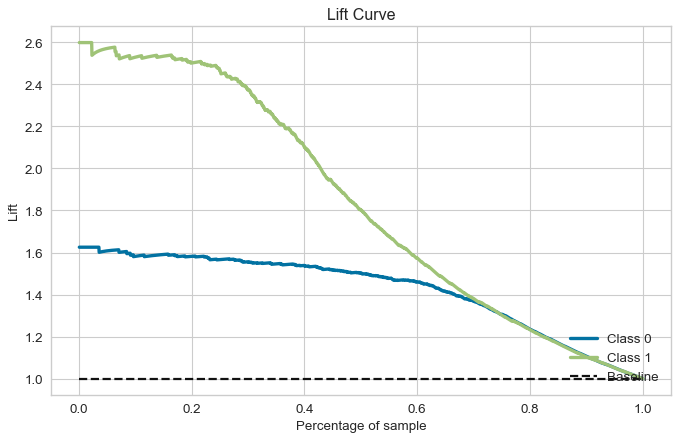

In [78]:
plot_model(rf_tuned, plot='lift', scale=0.8)

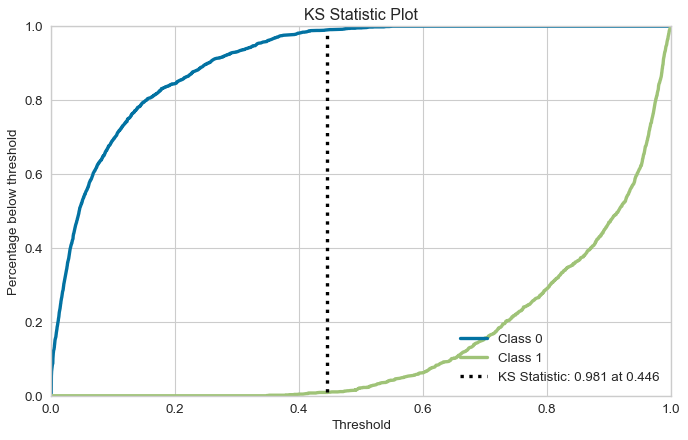

In [79]:
plot_model(rf_tuned, plot='ks', scale=0.8)

Interpretando o modelo com o Shap Values

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

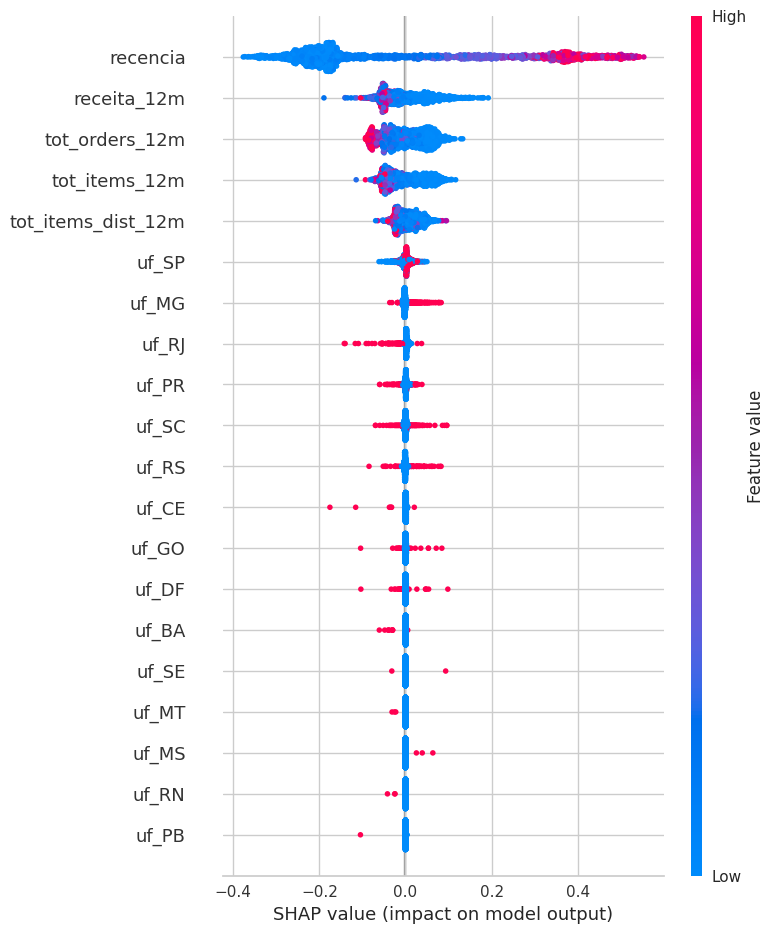

In [32]:
interpret_model(rf_tuned)

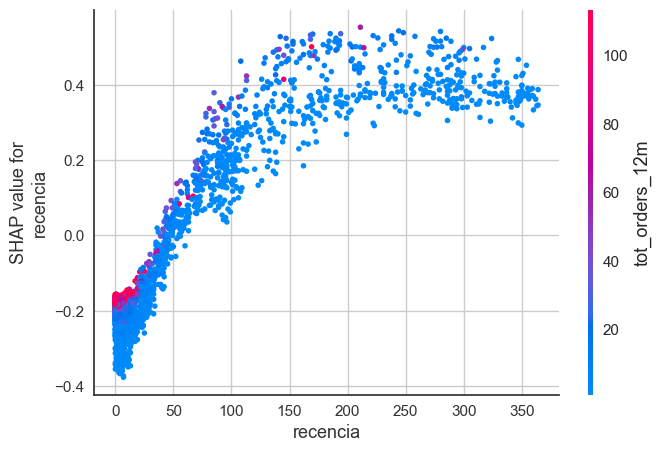

In [85]:
interpret_model(rf_tuned, plot='correlation', feature='recencia')

# Performance do modelo nos dados OOT

In [33]:
predict_model(rf_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8693,0.9251,0.8225,0.8352,0.8288,0.7231,0.7231


,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_AM,uf_BA,uf_CE,uf_DF,uf_ES,...,uf_RJ,uf_RN,uf_RO,uf_RS,uf_SC,uf_SE,uf_SP,nao_revendeu_next_6m,Label,Score
0,3.0,3.0,1.0,2685.000000,133.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.7400
1,178.0,209.0,9.0,21621.130859,8.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9873
2,44.0,48.0,20.0,1029.199951,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8769
3,1.0,1.0,1.0,120.000000,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8087
4,124.0,132.0,72.0,15104.919922,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,4.0,4.0,3.0,124.599998,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7352
1870,5.0,5.0,5.0,385.589996,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9139
1871,11.0,12.0,8.0,1450.199951,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9137
1872,13.0,13.0,3.0,1709.869995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9089


* ROCAUC Treino: 0.9247
* ROCAUC OOT: 0.9251

# Probabilidade por classe

In [81]:
predict_model(rf_tuned, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8693,0.9251,0.8225,0.8352,0.8288,0.7231,0.7231


,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_AM,uf_BA,uf_CE,uf_DF,uf_ES,...,uf_RN,uf_RO,uf_RS,uf_SC,uf_SE,uf_SP,nao_revendeu_next_6m,Label,Score_0,Score_1
0,3.0,3.0,1.0,2685.000000,133.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.2600,0.7400
1,178.0,209.0,9.0,21621.130859,8.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9873,0.0127
2,44.0,48.0,20.0,1029.199951,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8769,0.1231
3,1.0,1.0,1.0,120.000000,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.1913,0.8087
4,124.0,132.0,72.0,15104.919922,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9963,0.0037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,4.0,4.0,3.0,124.599998,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7352,0.2648
1870,5.0,5.0,5.0,385.589996,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9139,0.0861
1871,11.0,12.0,8.0,1450.199951,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9137,0.0863
1872,13.0,13.0,3.0,1709.869995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9089,0.0911


# Alterando o ponto de corte da probabilidade

In [82]:
predict_model(rf_tuned, raw_score=True, probability_threshold=0.8)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8239,0.9251,0.5673,0.9578,0.7125,0.5973,0.6399


,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_AM,uf_BA,uf_CE,uf_DF,uf_ES,...,uf_RN,uf_RO,uf_RS,uf_SC,uf_SE,uf_SP,nao_revendeu_next_6m,Label,Score_0,Score_1
0,3.0,3.0,1.0,2685.000000,133.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.2600,0.7400
1,178.0,209.0,9.0,21621.130859,8.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9873,0.0127
2,44.0,48.0,20.0,1029.199951,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8769,0.1231
3,1.0,1.0,1.0,120.000000,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.1913,0.8087
4,124.0,132.0,72.0,15104.919922,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9963,0.0037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,4.0,4.0,3.0,124.599998,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7352,0.2648
1870,5.0,5.0,5.0,385.589996,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9139,0.0861
1871,11.0,12.0,8.0,1450.199951,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9137,0.0863
1872,13.0,13.0,3.0,1709.869995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9089,0.0911


# Finalizando o modelo

Aqui iremos finalizar o treinamento do modelo treinando em todo o conjunto de dados disponível, inclusive no out of time (oot)

In [34]:
finalize_model(rf_tuned)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

# Salvando o modelo

In [35]:
save_model(rf_tuned, 'rf_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['uf'],
                                       display_types=True,
                                       features_todrop=['data_ref', 'seller_id'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['tot_orders_12m',
                                                           'tot_items_12m',
                                                           'tot_items_dist_12m',
                                                           'receita_12m',
                                                           'recencia'],
                                       target='nao_revendeu_next_6m',
                                       time_features=[])),
                 ('imputer',
                  S...
                  RandomForestClassifier(bootstrap=True, 

# Carregando o modelo salvo

In [9]:
rf_tuned_loaded = load_model('rf_tuned')

Transformation Pipeline and Model Successfully Loaded


# Criando uma API

In [ ]:
!pip install fastapi uvicorn

In [41]:
create_api(rf_tuned_loaded, 'rf_tuned_loaded_api')


API sucessfully created. This function only creates a POST API, it doesn't run it automatically.

To run your API, please run this command --> !python rf_tuned_loaded_api.py
    


Execute o comando abaixo e depois digite a seguinte url no navegador: http://localhost:8000/docs

In [1]:
!python rf_tuned_loaded_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [125309]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     192.168.7.7:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     192.168.7.7:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     192.168.7.7:0 - "GET /openapi.json HTTP/1.1" 200 OK
^C
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [125309]


# Criando um APP

In [ ]:
!pip install gradio

In [14]:
create_app(rf_tuned_loaded)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
